In [1]:
import MySegments
import MyVisualiser
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.externals import joblib

import os
from os import path
from os import mkdir
from os import listdir
from os.path import isfile, join


import itertools
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib

from matplotlib.ticker import ScalarFormatter

In [2]:
models = ['None']#,'LDA', 'FastICA']#,'Select_ANOVA', 'Select_Chi2', 'Select_Mutual_Info']
model_labels = ['default SVM']#, 'LDA', 'ICA', 'F-Score', 'Chi Square', 'Mutual Information']
clfs = []
cv_results = []

#load best estimators and cv results
for model in models:    
    for file in os.listdir('./Results/'+ model):
        if file.endswith('.pkl'):
            #print(os.path.join('./Results/' + model, file))
            clfs.append(joblib.load(os.path.join('./Results/' + model, file)))
            print(joblib.load(os.path.join('./Results/' + model, file)))
        if file.endswith('.csv'):
            cv_results.append(pd.read_csv(os.path.join('./Results/' + model, file), sep='\t'))#, header=1))

#Load Data
mypath = 'S2'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    
#Get labelled data
sc = MySegments.SegmentCollection(folder = mypath, segments_path=onlyfiles, labels_path = 'labels.csv', classes_path='class_names.csv')
idx,X,y = sc.get_labelled()

#split train and test data, maintaining class distributions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)



#grid = GridSearchCV(pipe, cv=3, n_jobs=2, param_grid=param_grid, return_train_score = True, verbose=10)

Pipeline(memory=Memory(cachedir='/tmp/py_sklearn_tmpcunl2wpt\\joblib'),
     steps=[('variance_thresh', VarianceThreshold(threshold=0.0)), ('scale', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('classify', SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=9.9999999999999995e-07,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])


In [3]:
import datetime
now = datetime.datetime.now()

In [4]:
from sklearn.preprocessing import RobustScaler
X_train = RobustScaler().fit_transform(X_train)

In [35]:
df = pd.DataFrame()


df['y'] = y_train

In [36]:
df['S2_NDWI_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDWI_mean']]
df['S2_NDVI_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDVI_mean']]
df['S2_B12_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B12_mean']]
df['S2_B11_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B11_mean']]
df['S2_B10_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B10_mean']]
df['S2_B9_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B9_mean']]
df['S2_B8_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B8_mean']]
df['S2_B7_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B7_mean']]
df['S2_B6_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B6_mean']]
df['S2_B5_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B5_mean']]
df['S2_B4_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B4_mean']]
df['S2_B3_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B3_mean']]
df['S2_B2_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B2_mean']]
df['S2_B1_mean'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B1_mean']]

df['S2_NDVI_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDWI_stdDev']]
df['S2_NDVI_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDVI_stdDev']]
df['S2_B12_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B12_stdDev']]
df['S2_B11_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B11_stdDev']]
df['S2_B10_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B10_stdDev']]
df['S2_B9_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B9_stdDev']]
df['S2_B8_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B8_stdDev']]
df['S2_B7_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B7_stdDev']]
df['S2_B6_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B6_stdDev']]
df['S2_B5_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B5_stdDev']]
df['S2_B4_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B4_stdDev']]
df['S2_B3_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B3_stdDev']]
df['S2_B2_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B2_stdDev']]
df['S2_B1_stdDev'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B1_stdDev']]


df['S2_NDVI_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDWI_min']]
df['S2_NDVI_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDVI_min']]
df['S2_B12_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B12_min']]
df['S2_B11_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B11_min']]
df['S2_B10_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B10_min']]
df['S2_B9_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B9_min']]
df['S2_B8_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B8_min']]
df['S2_B7_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B7_min']]
df['S2_B6_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B6_min']]
df['S2_B5_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B5_min']]
df['S2_B4_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B4_min']]
df['S2_B3_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B3_min']]
df['S2_B2_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B2_min']]
df['S2_B1_min'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B1_min']]


df['S2_NDVI_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDWI_max']]
df['S2_NDVI_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_NDVI_max']]
df['S2_B12_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B12_max']]
df['S2_B11_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B11_max']]
df['S2_B10_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B10_max']]
df['S2_B9_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B9_max']]
df['S2_B8_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B8_max']]
df['S2_B7_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B7_max']]
df['S2_B6_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B6_max']]
df['S2_B5_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B5_max']]
df['S2_B4_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B4_max']]
df['S2_B3_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B3_max']]
df['S2_B2_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B2_max']]
df['S2_B1_max'] = X_train[:,[i for i,x in enumerate(sc.feature_names) if x == 'S2_B1_max']]


df3 = df[df['y'] == 3]
df1 = df[df['y']==1]

In [37]:
classes = [-1,1,2,3,4,5,6,7,8,9,12]
class_labels = ['NaN', 'HDB', 'LDB', 'Roads','UGS','GC','Agriculture','Forest','Water', 'Bare Rock', 'Wetlands']
class_colors = ['Black', 'DarkRed', 'LightCoral', 'DimGray', 'Yellow', 'Lime', 'GoldenRod', 'ForestGreen', 'DodgerBlue', 'Black', 'DarkViolet']

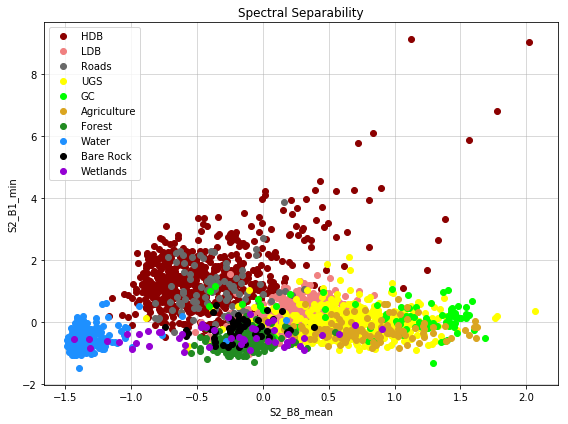

In [41]:
x = 'S2_B8_mean'
y = 'S2_B1_min'

clas_all = [1,2,3,4,5,6,7,8,9,10]
clas_veg = [4,5,6,7]
clas_con = [1,2,3]#,9]
clas_sel = clas_all

plt.clf()
fig, ax = plt.subplots(nrows=1,ncols=1, num='test_time', figsize=(8,6))
ax.grid(b=True, which='major', linestyle='-', alpha=0.6)
ax.grid(b=True, which='minor', linestyle='--', alpha=0.3)
ax.set_title('Spectral Separability')
for c in clas_sel:
    ax.plot(df[df['y']==classes[c]][x], df[df['y']==classes[c]][y], linestyle='None', c=class_colors[c], marker='o', label = class_labels[c])

ax.legend(loc='best')
ax.set_ylabel(y)
ax.set_xlabel(x)
fig.tight_layout()

In [30]:
len(y_unlabelled)

77558